# Librerias

In [1]:
# Importamos las librerias basicas de python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import seaborn as sb
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Limpieza y Lecutra del DataFrame

## Importación de DataFrame

In [2]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

file = 'Car_Insurance_Claim.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file, sep=',', encoding='ANSI')

## Descripción

In [3]:
#Veamos algunos datos del dataset

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
#Veamos un poco como esta compuesto el dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Podemos observar que el mismo contiene 10.000 observaciones, de las cuales hay valores nulos en credit_score y annual_mileage.

In [5]:
#eliminamos las filas con valores nulos en alguna de las dos features, no necesariamente son las mismas filas.

df = df.dropna()

In [6]:
#eliminamos todos los nulos dado que perdemos solamente 19% de los datos, esta parte podemos senbilizarla más adelante

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8149 non-null   int64  
 1   AGE                  8149 non-null   object 
 2   GENDER               8149 non-null   object 
 3   RACE                 8149 non-null   object 
 4   DRIVING_EXPERIENCE   8149 non-null   object 
 5   EDUCATION            8149 non-null   object 
 6   INCOME               8149 non-null   object 
 7   CREDIT_SCORE         8149 non-null   float64
 8   VEHICLE_OWNERSHIP    8149 non-null   float64
 9   VEHICLE_YEAR         8149 non-null   object 
 10  MARRIED              8149 non-null   float64
 11  CHILDREN             8149 non-null   float64
 12  POSTAL_CODE          8149 non-null   int64  
 13  ANNUAL_MILEAGE       8149 non-null   float64
 14  VEHICLE_TYPE         8149 non-null   object 
 15  SPEEDING_VIOLATIONS  8149 non-null   i

Miremos a simple vista algo de información de los principales parametros del dataset, como influyen ciertas caracteristicas que hacen al conductor en el hecho de tener un siniestro

## Visualización de parametros contra el "OUTCOME"

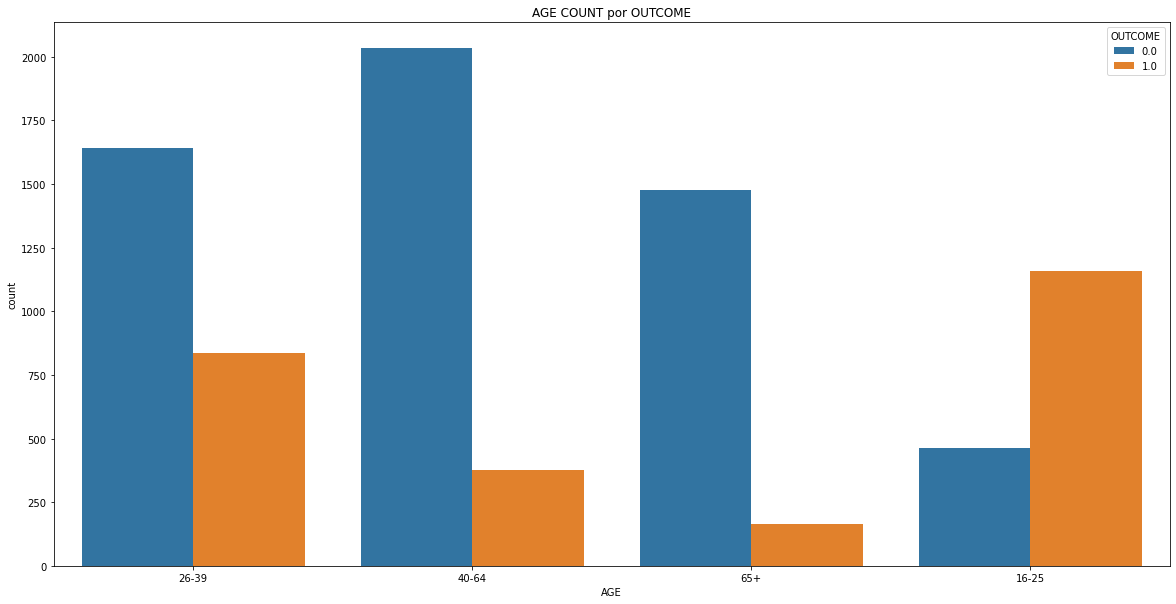

In [7]:
plt.figure(figsize=(20,10))
plt.title('AGE COUNT por OUTCOME')
sns.countplot(data=df, x ='AGE', hue='OUTCOME', order = df['AGE'].value_counts().index);

#ORDENAR POR COUNTS DE AGE

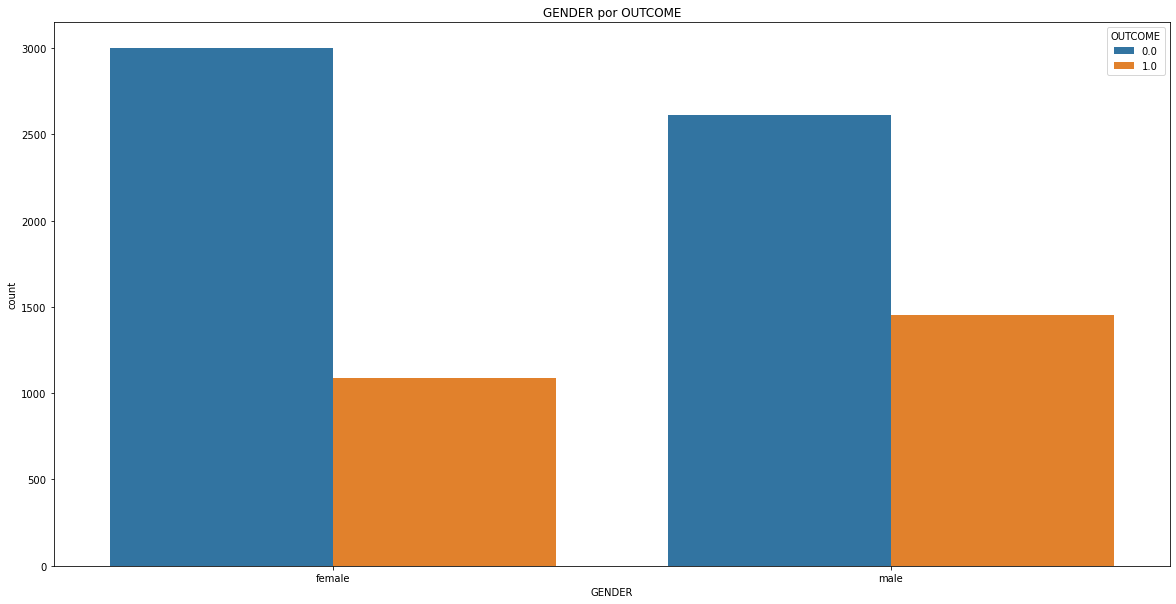

In [8]:
plt.figure(figsize=(20,10))
plt.title('GENDER por OUTCOME')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME');


<AxesSubplot:title={'center':'INCOME por OUTCOME'}, xlabel='INCOME', ylabel='count'>

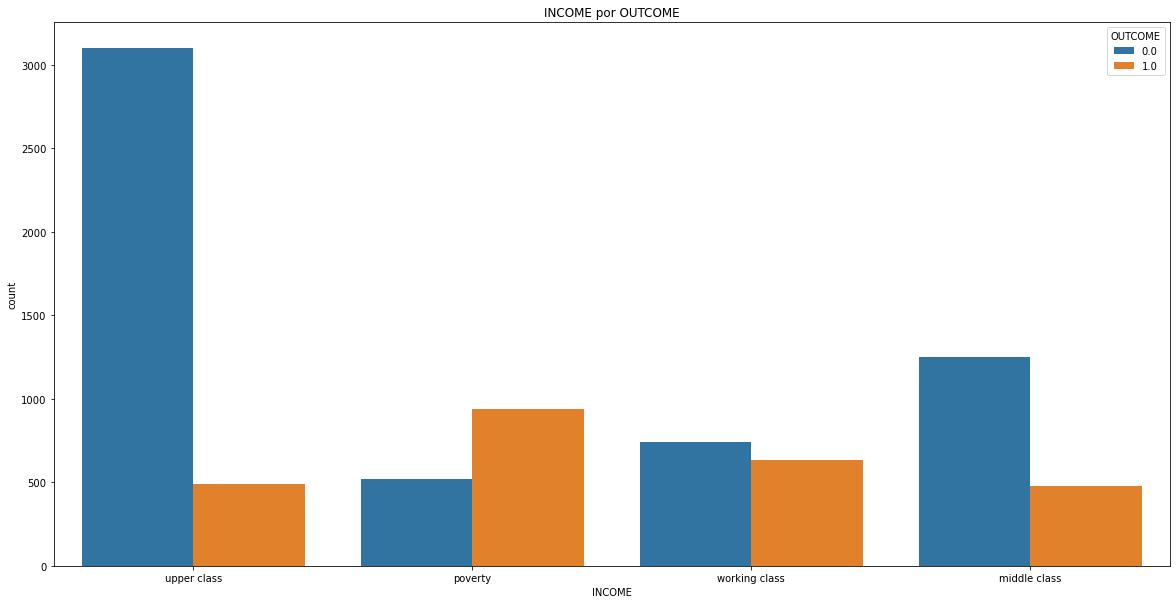

In [9]:
plt.figure(figsize=(20,10))
plt.title('INCOME por OUTCOME')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME')

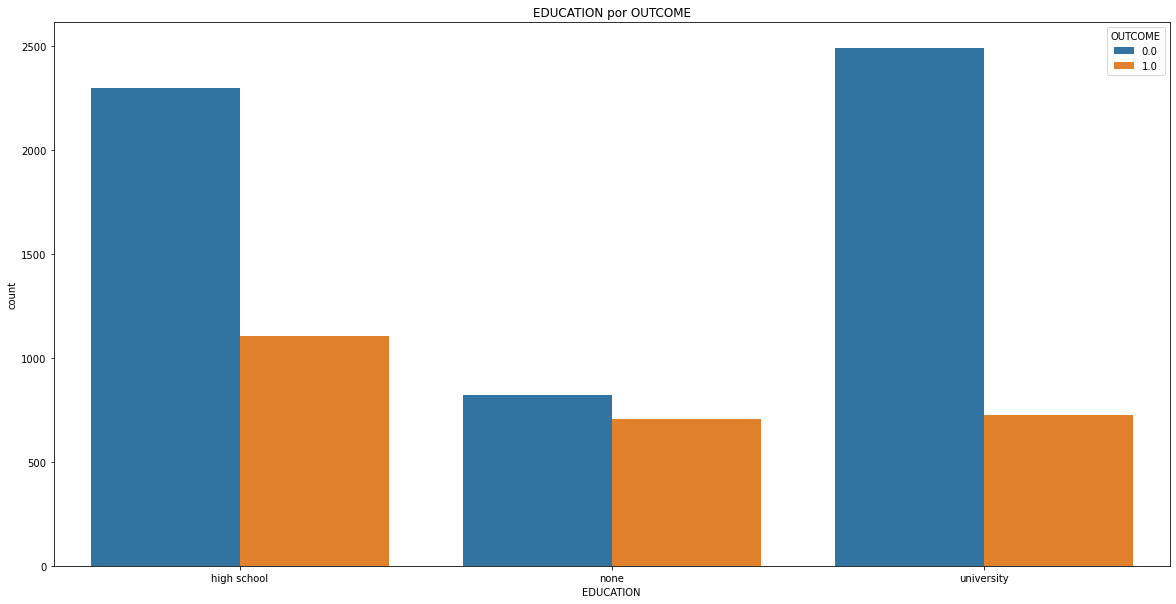

In [10]:
plt.figure(figsize=(20,10))
plt.title('EDUCATION por OUTCOME')
sns.countplot(data=df, x ='EDUCATION', hue='OUTCOME');

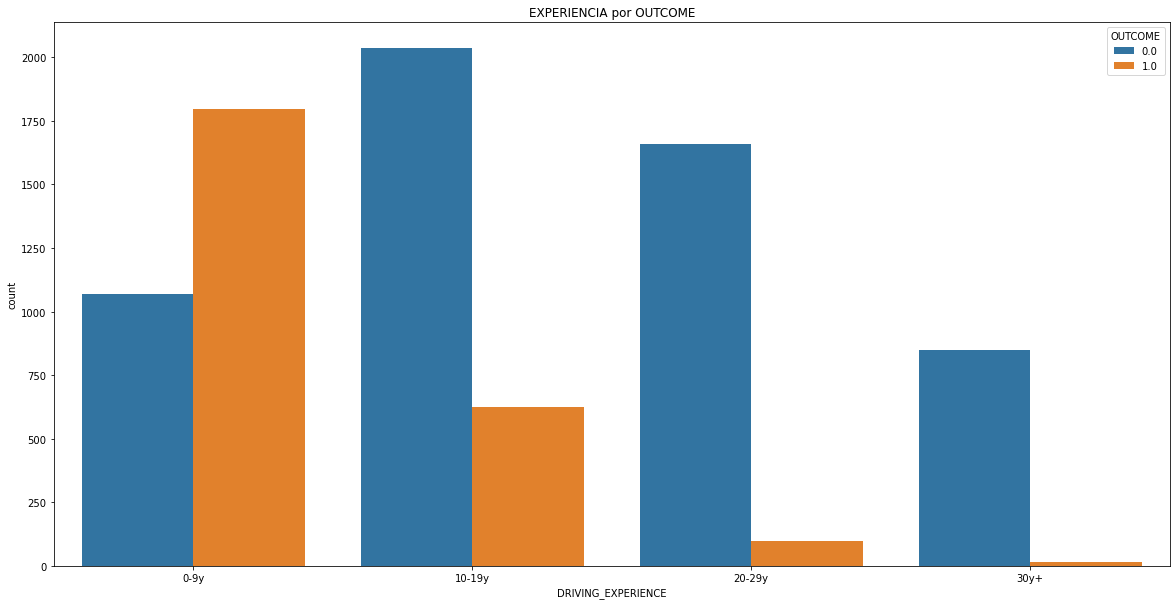

In [11]:
plt.figure(figsize=(20,10))
plt.title('EXPERIENCIA por OUTCOME')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME');

In [12]:
# hacemos un pairploting para explorar la informacion (puede tardar 30 segundos)

#sns.pairplot(df, hue="OUTCOME", palette="RdBu");

In [13]:
# Veamos algunos estadisticos del DF

df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000
mean,501339.680083,0.516368,0.699227,0.501043,0.689287,19725.567922,11693.45932,1.485581,0.240766,1.065530,0.311204
std,290857.727101,0.137684,0.458622,0.500030,0.462814,18784.308198,2822.35147,2.244711,0.557408,1.665623,0.463014
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.00000,0.000000,0.000000,0.000000,0.000000
25%,247706.000000,0.417891,0.000000,0.000000,0.000000,10238.000000,10000.00000,0.000000,0.000000,0.000000,0.000000
50%,503269.000000,0.526759,1.000000,1.000000,1.000000,10238.000000,12000.00000,0.000000,0.000000,0.000000,0.000000
75%,756207.000000,0.620074,1.000000,1.000000,1.000000,32765.000000,14000.00000,2.000000,0.000000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.00000,22.000000,6.000000,15.000000,1.000000


In [14]:
# Usamos ID como Indice

df = df.set_index(df['ID'], drop = True)

# Eliminamos la columna del df

df = df.drop(columns='ID')

### Creamos variables dummies para todas las variables categoricas

In [15]:
#AGE
df = pd.concat([df, pd.get_dummies(data = df['AGE'], prefix_sep='_', prefix= 'AGE')], axis = 1)
df = df.drop(columns='AGE')

#GENDER (BINARIA)
df = pd.concat([df, pd.get_dummies(data = df['GENDER'], drop_first=True)], axis = 1)
df = df.drop(columns='GENDER')

#RACE
df = pd.concat([df, pd.get_dummies(data = df['RACE'], prefix_sep='_', prefix= 'RACE')], axis = 1)
df = df.drop(columns='RACE')

#DRIVING_EXPERIENCE
df = pd.concat([df, pd.get_dummies(data = df['DRIVING_EXPERIENCE'], prefix_sep='_', prefix= 'DRV')], axis = 1)
df = df.drop(columns='DRIVING_EXPERIENCE')

#EDUCATION
df = pd.concat([df, pd.get_dummies(data = df['EDUCATION'], prefix_sep='_', prefix= 'EDU')], axis = 1)
df = df.drop(columns='EDUCATION')

#INCOME
df = pd.concat([df, pd.get_dummies(data = df['INCOME'], prefix_sep='_', prefix= 'INCOME')], axis = 1)
df = df.drop(columns='INCOME')

#VEHICLE_YEAR (BINARIA)
df = pd.concat([df, pd.get_dummies(data = df['VEHICLE_YEAR'], drop_first=True)], axis = 1)
df = df.drop(columns='VEHICLE_YEAR')
df.rename(columns = {'before 2015':'CAR_BEFORE_2015'}, inplace = True)

#DRIVING_EXPERIENCE
df = pd.concat([df, pd.get_dummies(data = df['VEHICLE_TYPE'], drop_first=True)], axis = 1)
df = df.drop(columns='VEHICLE_TYPE')

#aplicamos UPPER a las columnas
df.columns = df.columns.str.upper()

## Agregamos una columna nueva relacionando el codigo postal con el nombre de la ciudad.

In [16]:
# Creamos un diccionario con las ciudades y codigos postales

postal_codes = {10238: 'New York', 21217: 'Maryland', 32765: 'Florida', 92101: 'California'}

# Reemplazamos los valores con los del diccionario
  
df['STATE'] = df['POSTAL_CODE'].map(postal_codes) 

## Reubicamos la columna STATE luego de POSTAL_CODE (columna 5)
# Retiramos la columna STATE 

popped_state = df.pop('STATE') 

# La insertamos luego de la columna 5

df.insert(5, 'STATE', popped_state) 

# Observmos la columna, siendo una muestra de 4 estados decidimos hacer la variable dummy

df

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,STATE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,DRV_30Y+,EDU_HIGH SCHOOL,EDU_NONE,EDU_UNIVERSITY,INCOME_MIDDLE CLASS,INCOME_POVERTY,INCOME_UPPER CLASS,INCOME_WORKING CLASS,CAR_BEFORE_2015,SPORTS CAR
ID,,,,,,,,,,,,,,,,,,,,,
569520,0.629027,1.0,0.0,1.0,10238,New York,12000.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
750365,0.357757,0.0,0.0,0.0,10238,New York,16000.0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199901,0.493146,1.0,0.0,0.0,10238,New York,11000.0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
478866,0.206013,1.0,0.0,1.0,32765,Florida,11000.0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
731664,0.388366,1.0,0.0,0.0,32765,Florida,12000.0,2,0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752887,0.454300,1.0,0.0,0.0,10238,New York,16000.0,1,0,2,...,0,1,0,0,1,0,0,0,1,0
323164,0.582787,1.0,0.0,0.0,10238,New York,16000.0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
468409,0.470940,1.0,0.0,1.0,10238,New York,14000.0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [17]:
# De la misma forma anterior generamos la dummy de STATE

#STATE
df = pd.concat([df, pd.get_dummies(data = df['STATE'], prefix_sep='_', prefix= 'STATE')], axis = 1)
df = df.drop(columns='STATE')

df.columns = df.columns.str.upper()

# Por último dropeaomos POSTAL_CODE dado que ya deja ser necesaria

df = df.drop(columns='POSTAL_CODE')

df

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_16-25,...,INCOME_MIDDLE CLASS,INCOME_POVERTY,INCOME_UPPER CLASS,INCOME_WORKING CLASS,CAR_BEFORE_2015,SPORTS CAR,STATE_CALIFORNIA,STATE_FLORIDA,STATE_MARYLAND,STATE_NEW YORK
ID,,,,,,,,,,,,,,,,,,,,,
569520,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
750365,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,1,...,0,1,0,0,1,0,0,0,0,1
199901,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,...,0,0,0,1,1,0,0,0,0,1
478866,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0,1,...,0,0,0,1,1,0,0,1,0,0
731664,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752887,0.454300,1.0,0.0,0.0,16000.0,1,0,2,0.0,0,...,1,0,0,0,1,0,0,0,0,1
323164,0.582787,1.0,0.0,0.0,16000.0,0,0,1,0.0,0,...,0,0,1,0,1,0,0,0,0,1
468409,0.470940,1.0,0.0,1.0,14000.0,0,0,0,0.0,0,...,1,0,0,0,1,0,0,0,0,1


In [18]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_16-25,...,INCOME_MIDDLE CLASS,INCOME_POVERTY,INCOME_UPPER CLASS,INCOME_WORKING CLASS,CAR_BEFORE_2015,SPORTS CAR,STATE_CALIFORNIA,STATE_FLORIDA,STATE_MARYLAND,STATE_NEW YORK
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,...,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000
mean,0.516368,0.699227,0.501043,0.689287,11693.45932,1.485581,0.240766,1.065530,0.311204,0.198920,...,0.211928,0.17904,0.440299,0.168732,0.692355,0.047613,0.047490,0.242484,0.012517,0.697509
std,0.137684,0.458622,0.500030,0.462814,2822.35147,2.244711,0.557408,1.665623,0.463014,0.399212,...,0.408699,0.38341,0.496454,0.374538,0.461547,0.212960,0.212699,0.428612,0.111183,0.459365
min,0.053358,0.000000,0.000000,0.000000,2000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417891,0.000000,0.000000,0.000000,10000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.526759,1.000000,1.000000,1.000000,12000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.620074,1.000000,1.000000,1.000000,14000.00000,2.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.00000,22.000000,6.000000,15.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# armamos la columna SCORE multiplicando el numero de antecedentes con diferentes ponderaciones dependiendo de la gravedad del mismo

alpha = 2

beta = 5

gamma = 3

score = (df["SPEEDING_VIOLATIONS"]      * alpha + 
              df["DUIS"]                * beta  +   
              df["PAST_ACCIDENTS"]      * gamma
              )

df.insert(10, 'SCORE', score)

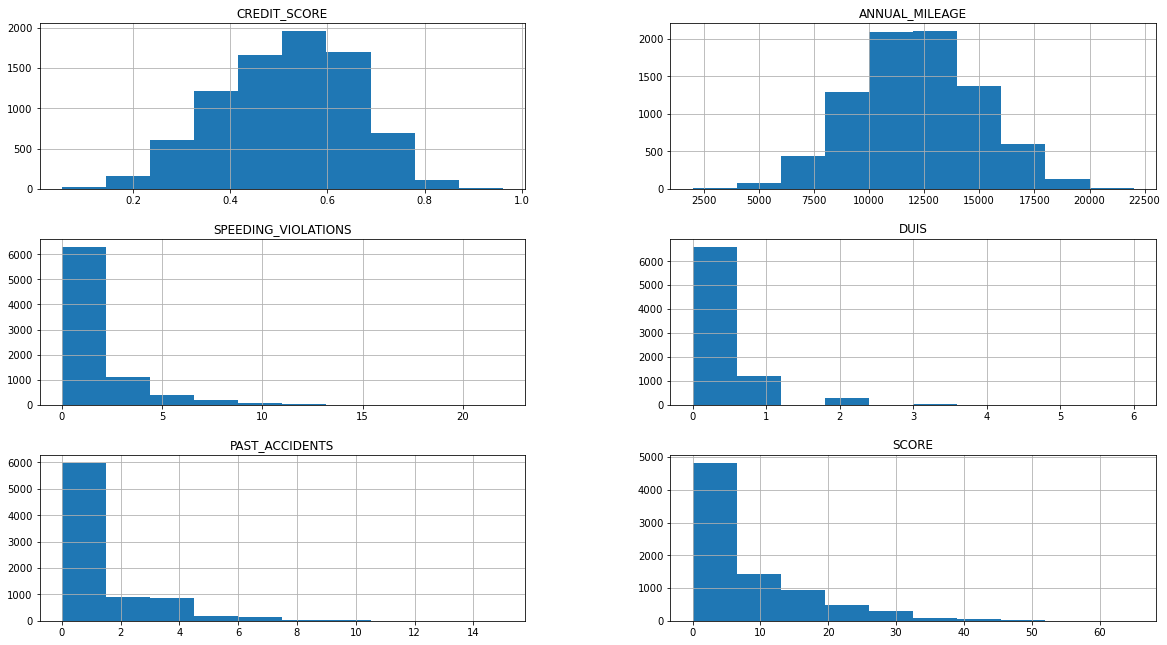

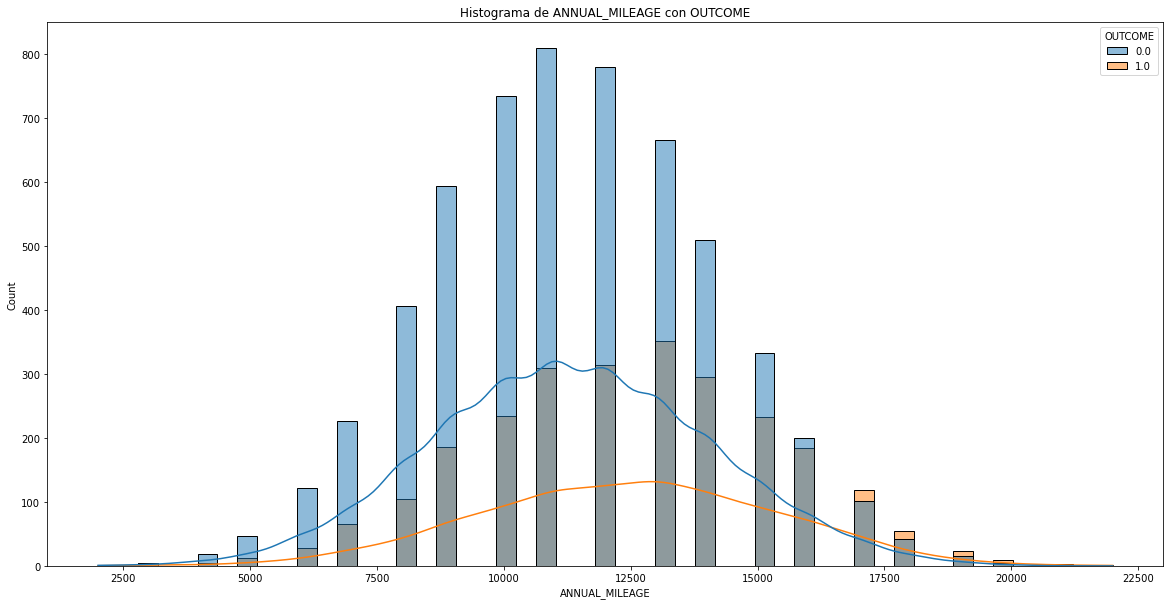

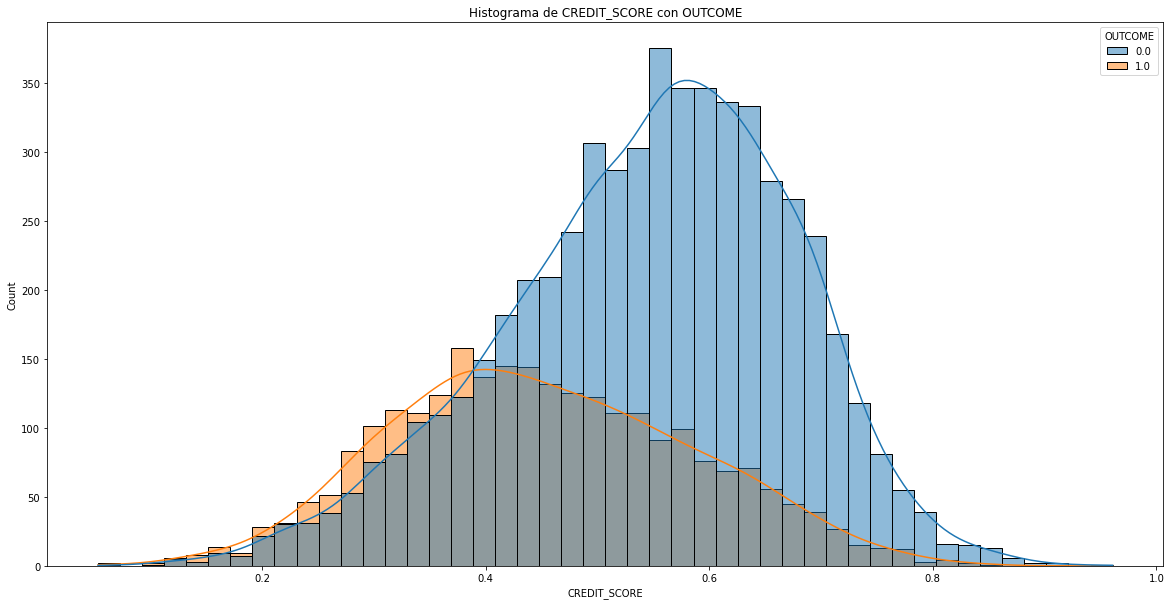

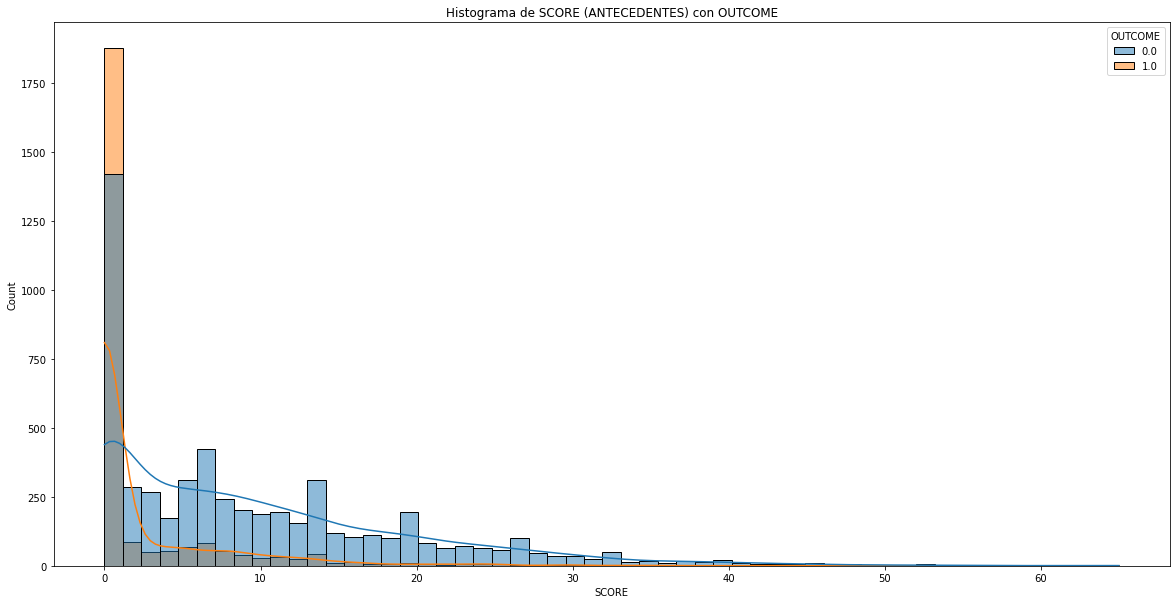

In [20]:
# Graficamos histogramas de las diferentes caracteristicas

df.hist(column=["CREDIT_SCORE", "ANNUAL_MILEAGE", 'SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS','SCORE'], figsize=(20,11))

plt.figure(figsize=(20,10))
plt.title('Histograma de ANNUAL_MILEAGE con OUTCOME')
sns.histplot(data=df, x='ANNUAL_MILEAGE',hue='OUTCOME', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histograma de CREDIT_SCORE con OUTCOME')
sns.histplot(data=df, x='CREDIT_SCORE',hue='OUTCOME', kde=True);

plt.figure(figsize=(20,10))
plt.title('Histograma de SCORE (ANTECEDENTES) con OUTCOME')
sns.histplot(data=df, x='SCORE',hue='OUTCOME', kde=True);

# Devolución de DF

In [21]:
# No encontramos evidencia de que los parametros DUIS SPORTS CAR ni SCORE ayuden a la predicción por lo que los dropeamos del df

pd.options.display.max_columns = 0

df = df.drop(['SCORE','SPORTS CAR','DUIS','CREDIT_SCORE'],axis=1)

In [22]:
df.describe()

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,OUTCOME,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,MALE,RACE_MAJORITY,RACE_MINORITY,DRV_0-9Y,DRV_10-19Y,DRV_20-29Y,DRV_30Y+,EDU_HIGH SCHOOL,EDU_NONE,EDU_UNIVERSITY,INCOME_MIDDLE CLASS,INCOME_POVERTY,INCOME_UPPER CLASS,INCOME_WORKING CLASS,CAR_BEFORE_2015,STATE_CALIFORNIA,STATE_FLORIDA,STATE_MARYLAND,STATE_NEW YORK
count,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000
mean,0.699227,0.501043,0.689287,11693.45932,1.485581,1.065530,0.311204,0.198920,0.303718,0.295987,0.201374,0.498834,0.898638,0.101362,0.351454,0.326666,0.215487,0.106393,0.417720,0.187508,0.394772,0.211928,0.17904,0.440299,0.168732,0.692355,0.047490,0.242484,0.012517,0.697509
std,0.458622,0.500030,0.462814,2822.35147,2.244711,1.665623,0.463014,0.399212,0.459891,0.456513,0.401052,0.500029,0.301826,0.301826,0.477454,0.469023,0.411185,0.308359,0.493214,0.390342,0.488832,0.408699,0.38341,0.496454,0.374538,0.461547,0.212699,0.428612,0.111183,0.459365
min,0.000000,0.000000,0.000000,2000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,12000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,14000.00000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,22000.00000,22.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K-Means

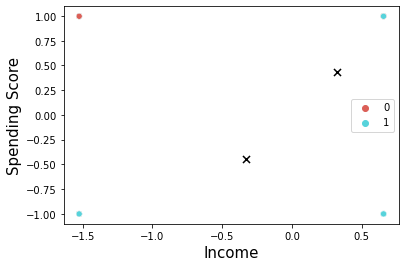

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X=df.drop(['OUTCOME'],axis=1)

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=2,random_state=10) # Numero de repeticiones=10
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 2));
plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

In [24]:
from sklearn.metrics import silhouette_score,silhouette_samples

clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X_scaled)


silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("For n_clusters =", 2,          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.12377151539457167


In [25]:
from sklearn.metrics import calinski_harabasz_score

score=calinski_harabasz_score(X_scaled,kmeans.labels_)
score

1142.1170805444406

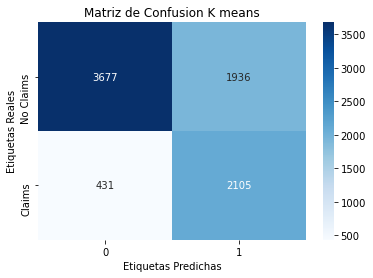

In [26]:
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist,squareform

y_true=df.OUTCOME


kmeans = KMeans(n_clusters=2, random_state=10) 
kmeans.fit(X_scaled)
labels_km = kmeans.labels_

ax = plt.axes()

sns.heatmap(confusion_matrix(y_true,labels_km),annot=True,cmap='Blues',fmt=".0f",yticklabels=['No Claims','Claims'], ax=ax);
ax.set_title('Matriz de Confusion K means')

plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales');

              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76      5613
         1.0       0.52      0.83      0.64      2536

    accuracy                           0.71      8149
   macro avg       0.71      0.74      0.70      8149
weighted avg       0.78      0.71      0.72      8149



Text(0.5, 1.0, 'Kmeans')

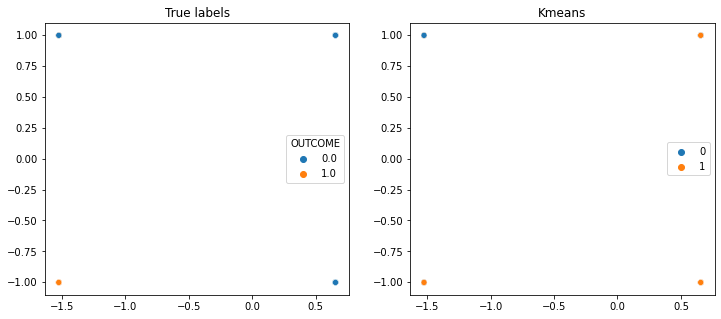

In [27]:
print(classification_report(y_true,labels_km))

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1],hue=labels_km,ax=ax[1])
ax[1].set_title('Kmeans')

In [28]:
mat_km = confusion_matrix(y_true,labels_km)

TP = mat_km[1, 1]
TN = mat_km[0, 0]
FP = mat_km[0, 1]
FN = mat_km[1, 0]

#Specificity
specificity_km = TN / (TN + FP)
print("Specificity: ", "{:.2%}".format(specificity_km))

Specificity:  65.51%


In [29]:
# TFN: tasa de Falsos negativos (tasa de error) - es la probabilidad de que la prueba pase por alto un True Positive
TFN = FN / (FN + TP)
print("Tasa de error: ", "{:.2%}".format(TFN))

Tasa de error:  17.00%


# Naive-Bayes

### Entrenamiento

In [30]:
# Elegimos la variable objetivo y = OUTCOME, mientras que los parametros son todos los demás definidos en el df
# Dropeamos OUTCOME para definir X

X = df.drop(['OUTCOME'],axis=1)
y = df['OUTCOME']

In [31]:
print(X.shape, y.shape)

(8149, 29) (8149,)


In [32]:
# Definicion entre TRAIN y TEST en un 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Estandarizacion

In [33]:
# Utilizamos sklearn para estandarizar la matriz de Features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

modelo_NB = GaussianNB()
modelo_NB.fit(X_train, y_train)

GaussianNB()

In [35]:
#Estandarizamos el set de testeo luego de trabajar el scaler

X_test = scaler.transform(X_test)

# Definimos las predicciones 

labels_predichas = modelo_NB.predict(X_test)

In [36]:
# Accurarcy del Modelo de Naive Bayes

from sklearn.metrics import accuracy_score
accuracy_NB = accuracy_score(y_test, labels_predichas)
#accuracy_score(y_test, labels_predichas))
print("Accuracy w/ Naive Bayes: ", "{:.2%}".format(accuracy_score(y_test, labels_predichas)))

Accuracy w/ Naive Bayes:  79.98%


              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87      1401
         1.0       0.78      0.50      0.61       637

    accuracy                           0.80      2038
   macro avg       0.79      0.72      0.74      2038
weighted avg       0.80      0.80      0.79      2038



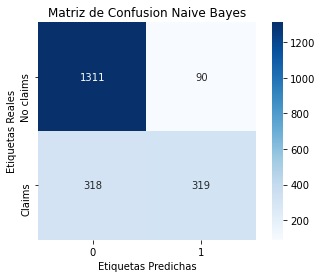

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
mat = confusion_matrix(y_test, labels_predichas)

ax = plt.axes()
y = df['OUTCOME']
sns.heatmap(mat, square=True, annot=True, cbar=True,
            yticklabels=['No claims','Claims'], cmap='Blues', ax=ax
            , fmt=".0f")

ax.set_title('Matriz de Confusion Naive Bayes')

plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales');

print(classification_report(y_test, labels_predichas))

In [38]:
mat_nb = confusion_matrix(y_test, labels_predichas)

TP = mat_nb[1, 1]
TN = mat_nb[0, 0]
FP = mat_nb[0, 1]
FN = mat_nb[1, 0]

#Specificity
specificity_nb = TN / (TN + FP)
print("Specificity: ", "{:.2%}".format(specificity_nb))

Specificity:  93.58%


In [39]:
# TFN: tasa de Falsos negativos (tasa de error) - es la probabilidad de que la prueba pase por alto un True Positive
TFN_nb = FN / (FN + TP)
print("Tasa de error: ", "{:.2%}".format(TFN_nb))

Tasa de error:  49.92%


# Clustering Jerárquico

In [40]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Dropeamos la variable Target "Outcome" y también la variable "Credit_Score" debido a que tiene valores atipicos que afectan negativamente el modelo.

X = df.drop(['OUTCOME'], axis= 1)
X = pd.DataFrame.reset_index(X)
X

,ID,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,MALE,RACE_MAJORITY,RACE_MINORITY,DRV_0-9Y,DRV_10-19Y,DRV_20-29Y,DRV_30Y+,EDU_HIGH SCHOOL,EDU_NONE,EDU_UNIVERSITY,INCOME_MIDDLE CLASS,INCOME_POVERTY,INCOME_UPPER CLASS,INCOME_WORKING CLASS,CAR_BEFORE_2015,STATE_CALIFORNIA,STATE_FLORIDA,STATE_MARYLAND,STATE_NEW YORK
0,569520,1.0,0.0,1.0,12000.0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,750365,0.0,0.0,0.0,16000.0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,199901,1.0,0.0,0.0,11000.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
3,478866,1.0,0.0,1.0,11000.0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
4,731664,1.0,0.0,0.0,12000.0,2,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,752887,1.0,0.0,0.0,16000.0,1,2,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
8145,323164,1.0,0.0,0.0,16000.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
8146,468409,1.0,0.0,1.0,14000.0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
8147,903459,0.0,0.0,1.0,13000.0,2,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [42]:
# Llevamos a la misma escala los datos de las feature
scaler=StandardScaler()
X_sc=scaler.fit_transform(X)

In [43]:
# Probamos los diferentes tipos de Linkage para verificar cual se adapta mejor a nuestro dataset.
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=X_sc)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=X_sc)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None)
modelo_hclust_ward.fit(X=X_sc)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [44]:
# '''Esta función extrae la información de un modelo AgglomerativeClustering y representa su dendograma con la función dendogram de scipy.cluster.hierarchy '''

def plot_dendrogram(model, **kwargs):

    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [45]:
# Comentamos la celda y pegamos la imágen debajo con el resultado, por el tiempo de procesamiento
## VERIFICAMOS LOS 3 LINKAGE PARA BUSCAR EL MEJOR.

# fig, axs = plt.subplots(3, 1, figsize=(8, 8))
# plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
# axs[0].set_title("Distancia euclídea, Linkage average")
# plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
# axs[1].set_title("Distancia euclídea, Linkage complete")
# plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
# axs[2].set_title("Distancia euclídea, Linkage ward")
# plt.tight_layout();

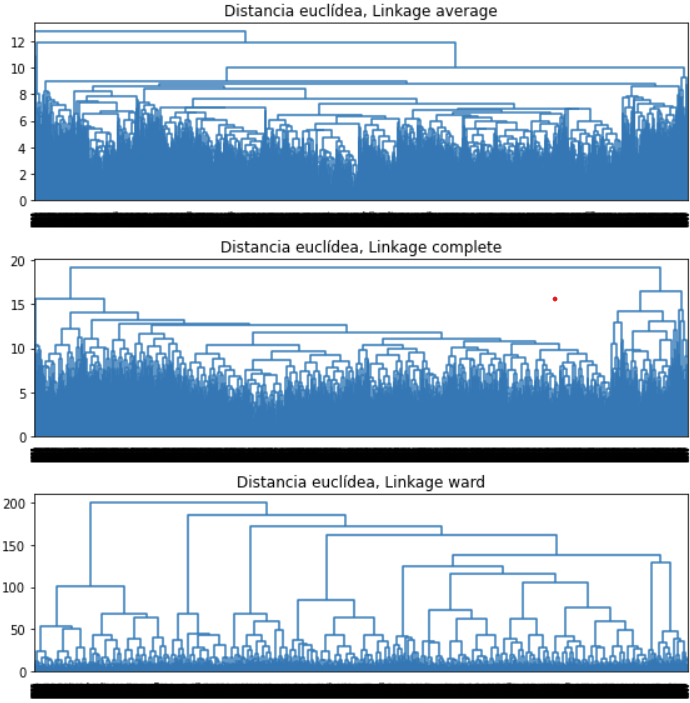

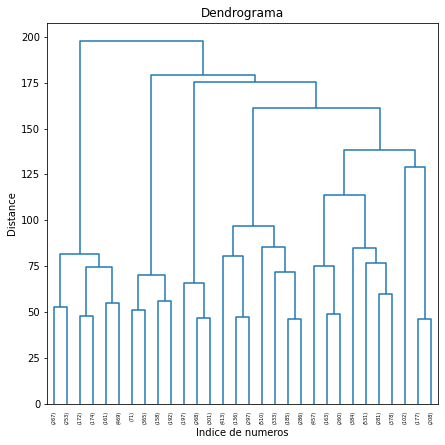

In [46]:
# Graficamos el Dendrograma con el linkage Ward debido a que es el que mejor se adapta al dataset
Z = linkage(X_sc, 'ward');

plt.figure(figsize=[7,7])
plt.title('Dendrograma')
plt.xlabel('Indice de numeros')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

In [47]:
# Podemos ver que el mejor corte está entre 180 y 200 de distance, dando lugar a 2 clusters.

In [48]:
# Ingresamos la linea de corte a la altura especificada

#fig, ax = plt.subplots(1, 1, figsize=(8, 4))
#altura_corte = 190
#plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
#ax.set_title("Distancia euclídea, Linkage ward")
#ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
#ax.legend();

In [49]:
# Una vez identificado el número óptimo de clusters, se reentrena el modelo indicando este valor.
# Modelo 
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 2
                     )
modelo_hclust_ward.fit(X=X_sc)

AgglomerativeClustering()

In [50]:
# Predecimos con el modelo entrenado los datos escalados
y_hc = modelo_hclust_ward.fit_predict(X_sc)

In [51]:
# Evaluamos el Coeficiente cofenético
c,dists=cophenet(Z, pdist(X_sc))
print('Cophenetic coefficient:',c)

Cophenetic coefficient: 0.48532079423519014


              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84      5613
         1.0       0.70      0.41      0.52      2536

    accuracy                           0.76      8149
   macro avg       0.74      0.67      0.68      8149
weighted avg       0.75      0.76      0.74      8149



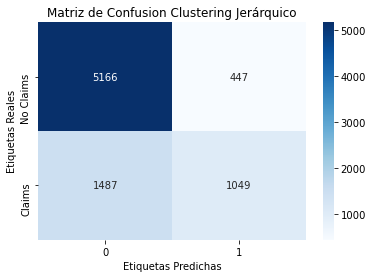

In [52]:
# Evaluamos el modelo con la matriz de confusión y lo graficamos con un Heatmap. Agregamos también las diferentes métricas de evaluación.
from sklearn.metrics import classification_report,confusion_matrix

ax = plt.axes()
y = df['OUTCOME']
sns.heatmap(confusion_matrix(y,y_hc),annot=True,cmap='Blues',fmt=".0f", yticklabels=['No Claims','Claims'], ax=ax);
ax.set_title('Matriz de Confusion Clustering Jerárquico')

plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales');

print(classification_report(y,y_hc))


In [53]:
mat_cj = confusion_matrix(y,y_hc)

TP = mat_cj[1, 1]
TN = mat_cj[0, 0]
FP = mat_cj[0, 1]
FN = mat_cj[1, 0]

#Specificity
specificity_cj = TN / (TN + FP)
print("Specificity: ", "{:.2%}".format(specificity_cj))

Specificity:  92.04%


In [54]:
# TFN: tasa de Falsos negativos (tasa de error) - es la probabilidad de que la prueba pase por alto un True Positive
TFN_cj = FN / (FN + TP)
print("Tasa de error: ", "{:.2%}".format(TFN_cj))

Tasa de error:  58.64%


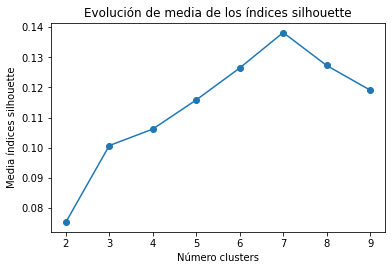

In [55]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 10)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X_sc)
    silhouette_avg = silhouette_score(X_sc, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

KNN

In [56]:
#iniciamos dandole valor a las variables X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X, y_true, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#procedemos a correr el modelo KNN... Definimos como 7 el número de K (Confirmar que estemos bien con este valor)
n_neighbors = 7
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}' .format(knn.score(X_train, Y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}' .format(knn.score(X_test, Y_test)))


Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.82


In [58]:
#creamos la matriz de confusión con su respectivo reporte de test del conjunto
pred = knn.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[1233  159]
 [ 217  429]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1392
         1.0       0.73      0.66      0.70       646

    accuracy                           0.82      2038
   macro avg       0.79      0.77      0.78      2038
weighted avg       0.81      0.82      0.81      2038



In [59]:
#creamos la gráfica para ver la clasificación que hemos obtenido
h = 0.2
cmap_light =ListedColormap(['#FFAAAA','#ffcc99','#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold =ListedColormap(['#FF0000','#ff9933','#FFFF00','#00ffff','#00FF00'])

clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X,Y)

X_min, X_max = X[:,0].min() -1,X[:,0].max() + 1
X_min, X_max = X[:,0].min() -1,X[:,0].max() + 1
XX, YY = np.meshgrid(np.arange(X_min, Y_max, h))
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.reschape)
plt.figure()
plt.pcolormesh(XX, YY, Z, cmap=cmap_ligth)

plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)

plt.Xlim(XX.min(), XXmax())
plt.Ylim(YY.min(), YYmax())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3, patch4])

plt.title("5-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()

NameError: name 'ListedColormap' is not defined